# UNSW-NB15 Data Exploration

This notebook explores the UNSW-NB15 dataset, focusing on class distribution, feature statistics, and data quality.

## Requirements
- Ensure `UNSW_NB15_training-set.csv` and `UNSW_NB15_testing-set.csv` are in `../../data/raw/unsw-nb15/`.

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pathlib import Path

# Set style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Load Data

In [12]:
DATA_DIR = Path("../../data/raw/unsw-nb15")
TRAIN_PATH = DATA_DIR / "UNSW_NB15_training-set.csv"
TEST_PATH = DATA_DIR / "UNSW_NB15_testing-set.csv"

if not TRAIN_PATH.exists() or not TEST_PATH.exists():
    print("❌ Dataset files not found!")
    print(f"Please download UNSW_NB15_training-set.csv and UNSW_NB15_testing-set.csv to: {DATA_DIR.absolute()}")
else:
    print("✅ Found dataset files.")

✅ Found dataset files.


In [13]:
try:
    train_df = pd.read_csv(TRAIN_PATH)
    test_df = pd.read_csv(TEST_PATH)
    print(f"Training set shape: {train_df.shape}")
    print(f"Testing set shape: {test_df.shape}")
    
    # Combine for analysis if needed, but keeping separate is usually good for distribution check
    combined_df = pd.concat([train_df, test_df])
    print(f"Total samples: {combined_df.shape[0]}")
except FileNotFoundError:
    print("Cannot load data. Please ensure files exist.")
    train_df = pd.DataFrame() # Empty to prevent errors below

Training set shape: (82332, 45)
Testing set shape: (175341, 45)
Total samples: 257673


## 2. Data Overview

In [14]:
if not train_df.empty:
    display(train_df.head())

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [15]:
if not train_df.empty:
    print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [16]:
# Check for missing values
if not train_df.empty:
    missing = train_df.isnull().sum()
    missing = missing[missing > 0]
    if len(missing) > 0:
        print("Missing values:")
        print(missing)
    else:
        print("No missing values found.")

No missing values found.


## 3. Class Distribution

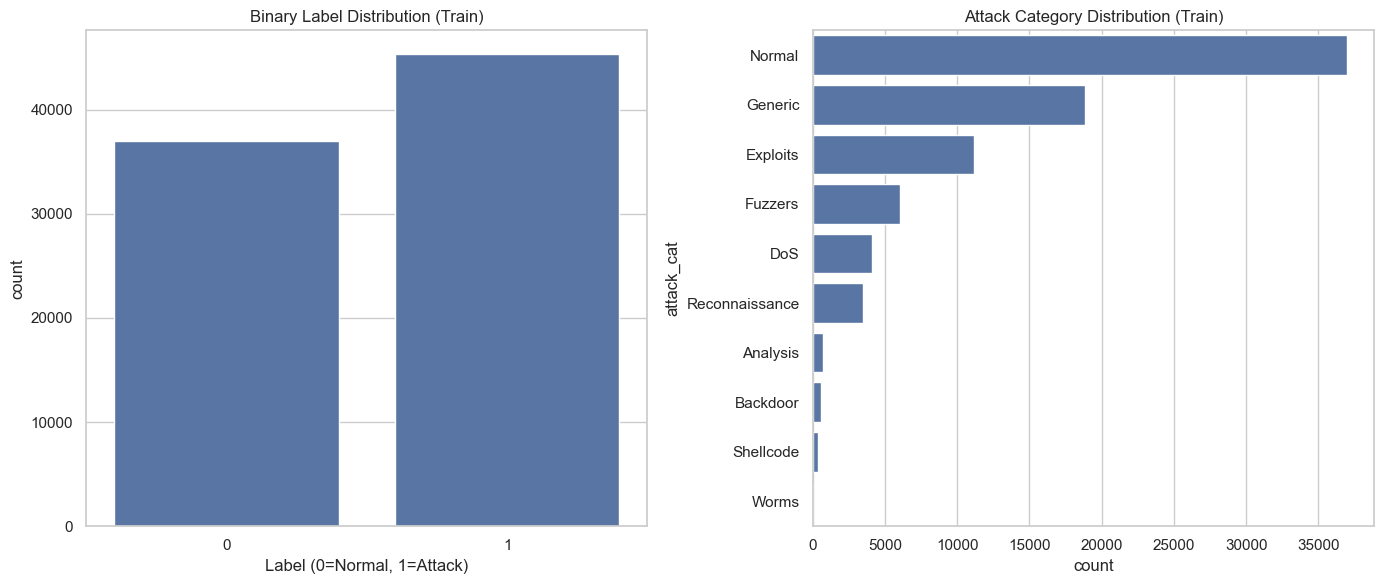

In [17]:
if not train_df.empty:
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    # Binary Class Distribution
    sns.countplot(data=train_df, x='label', ax=ax[0])
    ax[0].set_title('Binary Label Distribution (Train)')
    ax[0].set_xlabel('Label (0=Normal, 1=Attack)')
    
    # Attack Category Distribution
    sns.countplot(data=train_df, y='attack_cat', ax=ax[1], order=train_df['attack_cat'].value_counts().index)
    ax[1].set_title('Attack Category Distribution (Train)')
    
    plt.tight_layout()
    plt.show()

## 4. Correlation Analysis

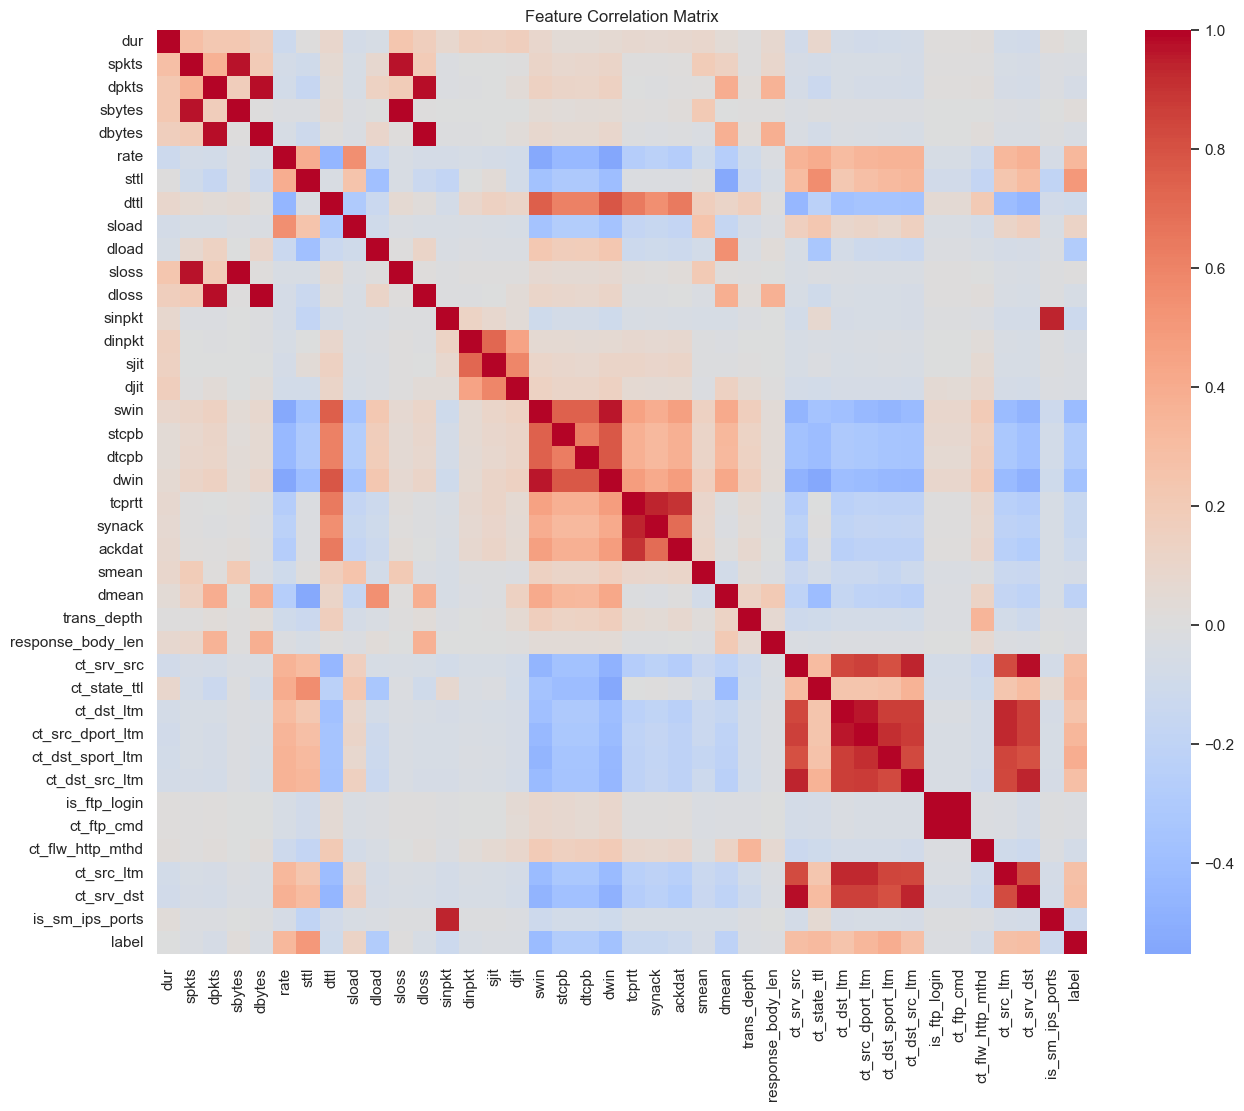

In [18]:
if not train_df.empty:
    # Select only numeric columns
    numeric_cols = train_df.select_dtypes(include=[np.number]).columns
    # Drop 'id' if it exists as it's not a feature
    if 'id' in numeric_cols:
        numeric_cols = numeric_cols.drop('id')
        
    corr = train_df[numeric_cols].corr()
    
    plt.figure(figsize=(15, 12))
    sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
    plt.title('Feature Correlation Matrix')
    plt.show()

## 5. Feature Distributions

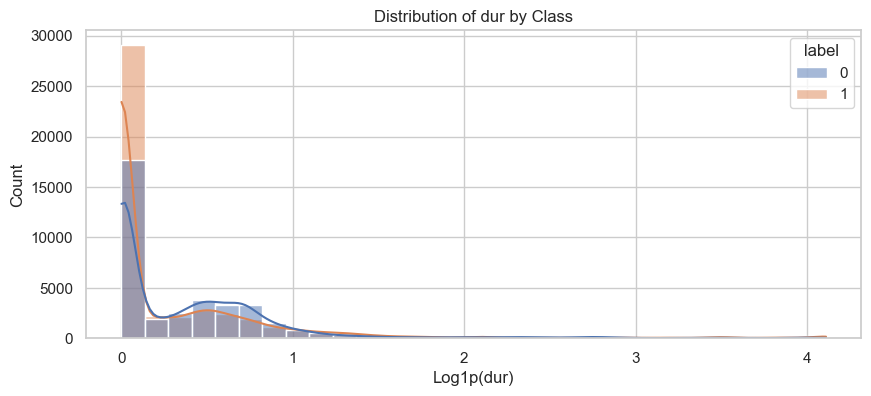

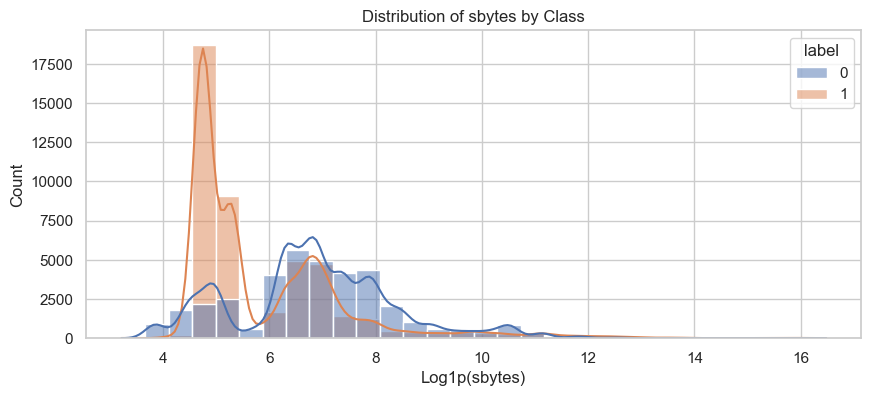

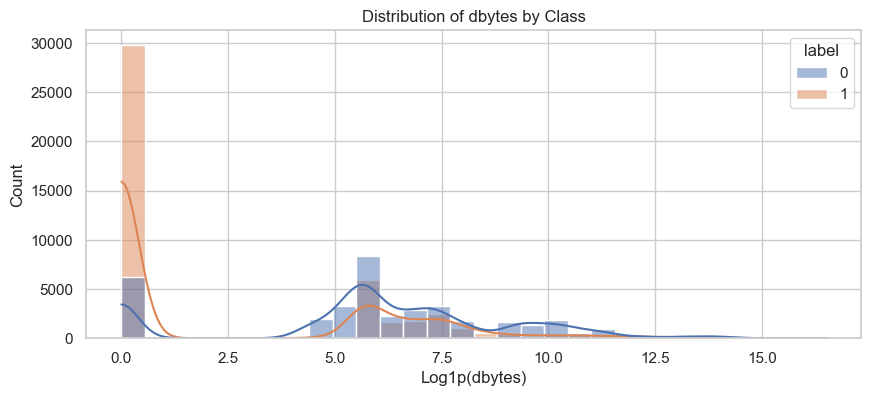

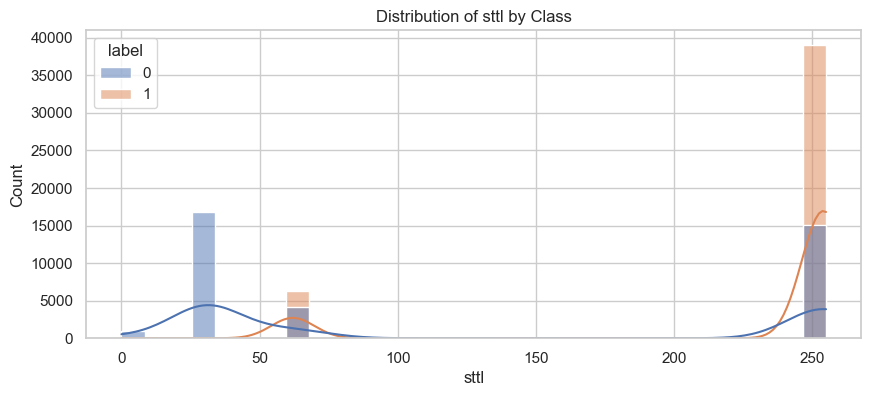

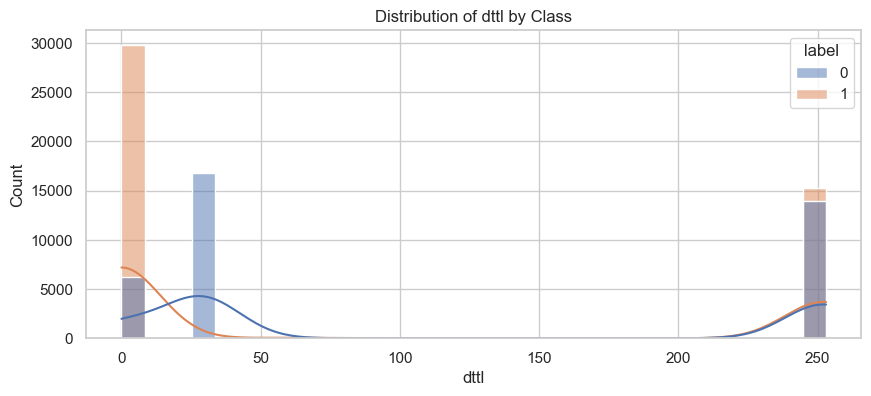

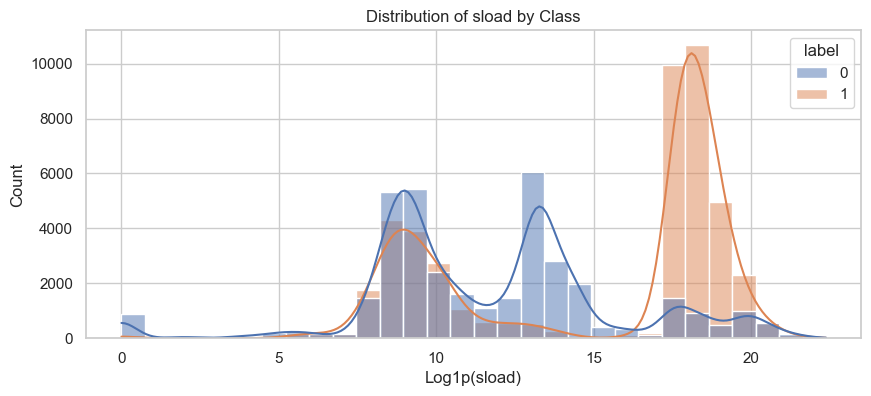

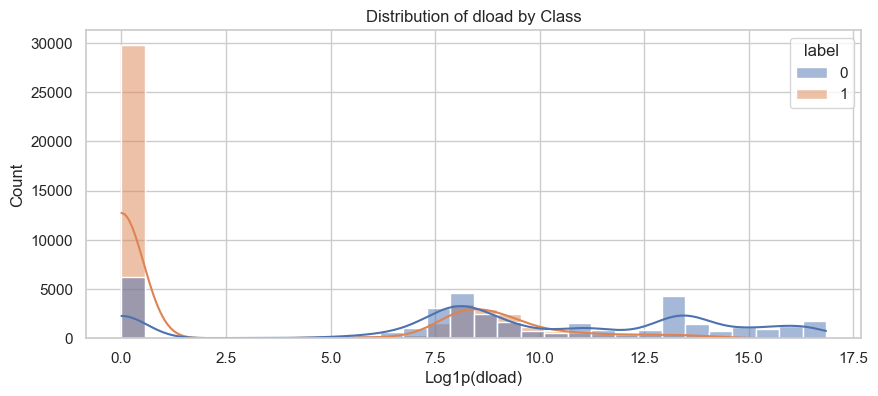

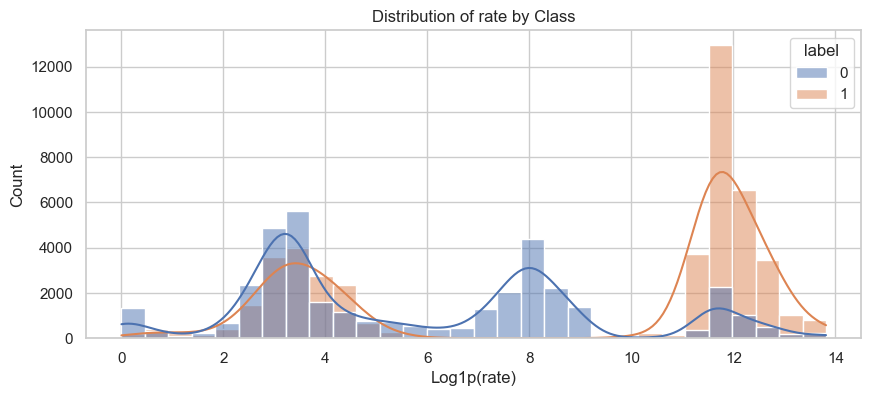

In [19]:
if not train_df.empty:
    # Check for and clean infinite values before any plotting
    if np.isinf(train_df.select_dtypes(include=np.number)).any().any():
        print("⚠️ Infinite values found! Replacing with NaN and dropping...")
        train_df = train_df.replace([np.inf, -np.inf], np.nan).dropna()
        
    # Plot a few key features to see their distributions split by label
    key_features = ['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sload', 'dload', 'rate']
    
    # Filter features that actually exist in the dataframe
    plot_features = [f for f in key_features if f in train_df.columns]
    
    for feature in plot_features:
        plt.figure(figsize=(10, 4))
        # Use log scale for some features that might be skewed
        if feature in ['dur', 'sbytes', 'dbytes', 'sload', 'dload', 'rate']:
             # Safe log plot handling zeros via log1p
             # We use a temporary copy for plotting to avoid Modifying original df in loop
             plot_data = train_df.copy()
             # Replace 0 with a small value or use log1p
             safe_x = np.log1p(plot_data[feature])
             
             sns.histplot(x=safe_x, hue=plot_data['label'], bins=30, kde=True)
             plt.xlabel(f'Log1p({feature})')
        else:
             sns.histplot(data=train_df, x=feature, hue='label', bins=30, kde=True)
             
        plt.title(f'Distribution of {feature} by Class')
        plt.show()